In [1]:
import keras
import numpy as np
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 2)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

Using TensorFlow backend.


1 Physical GPUs, 1 Logical GPUs


In [81]:
d = 100 # datapoints / feature dimensions
k = 3  # principal components
B = 40 # Batch size
n_classes = 2
    
# Import PCA from sklearn
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import uuid

classes = []
arr_guid = [str(uuid.uuid4()) for i in range(B*n_classes)] 

c_obj1 = {
    'meta' : {},
    'layers': []
}
c_obj2 = {
    'meta' : {},
    'layers': []
}

classes.append(c_obj1)

classes.append(c_obj2)

print(classes[0])
print(classes[1])


for layer_i in range(0,20):
    
    #two random matrix for two classes
    M = np.random.normal(0, 1, (d, k)) 
    N = np.random.normal(0, 1, (d, k))
    #print(M)
    
    # compute subspace for each class using qr decomposition. 
    # this way we get a uniformly random subspace q,s for each class
    q,r = tf.linalg.qr(M)
    s,t = tf.linalg.qr(N)
    #print(q)
    #print(r)
    
    
    # pick different Z for different classes 
    Z_1 = np.random.normal(-1, 1, (k, B))
    Z_2 = np.random.normal(-1, 1, (k, B))
    
    # observe some noisy samples from each class (additive random normal noise)
    X_1 = np.matmul(q, Z_1) + np.random.normal(0, 0.1, (d, B))
    X_2 = np.matmul(s, Z_2) + np.random.normal(0, 0.1, (d, B))

    #print(X_1)
    #print(X_2) 

    # Instantiate PCA
    pca = PCA(n_components=k)

    # Fit PCA to features
    X_1 = np.matrix.transpose(X_1)
    X_2 = np.matrix.transpose(X_2)
    fullX = np.concatenate((X_1, X_2), axis=0)
    
    fpca = PCA(n_components=k)
    X = fpca.fit_transform(fullX)
    #print(X)
    X = X[:,:2]  #just keep the two columns for visualization

    
    # Create a new dataset from principal components 
    df = pd.DataFrame(data = X, 
                      columns = ['PC1', 'PC2'])
    #print(np.shape(df))

    target = pd.Series(np.concatenate((np.full(B, 0), np.full(B, 1)), axis=0), name='y')
    #print(np.shape(target))

    result_df = pd.concat([df, target], axis=1)
    
    print(np.shape(result_df))
    #print(result_df)
    
    class1_layer = []
    class2_layer = []

    for idx, i in enumerate(X[:40]): 
        point = {
            'x': i[0],
            'y': i[1],
            'pred': 0,
            'actual': 0,
            'guid': arr_guid[idx]
        }
        class1_layer.append(point)


    for idx, i in enumerate(X[40:]):
        point = {
            'x': i[0],
            'y': i[1],
            'pred': 1,
            'actual': 1,
            'guid': arr_guid[idx]
        }
        class2_layer.append(point)
        
    print(layer_i)
    classes[0]['layers'].append(class1_layer)
    classes[1]['layers'].append(class2_layer)
    
    

    
    
    
    

{'meta': {}, 'layers': []}
{'meta': {}, 'layers': []}
(80, 3)
0
(80, 3)
1
(80, 3)
2
(80, 3)
3
(80, 3)
4
(80, 3)
5
(80, 3)
6
(80, 3)
7
(80, 3)
8
(80, 3)
9
(80, 3)
10
(80, 3)
11
(80, 3)
12
(80, 3)
13
(80, 3)
14
(80, 3)
15
(80, 3)
16
(80, 3)
17
(80, 3)
18
(80, 3)
19


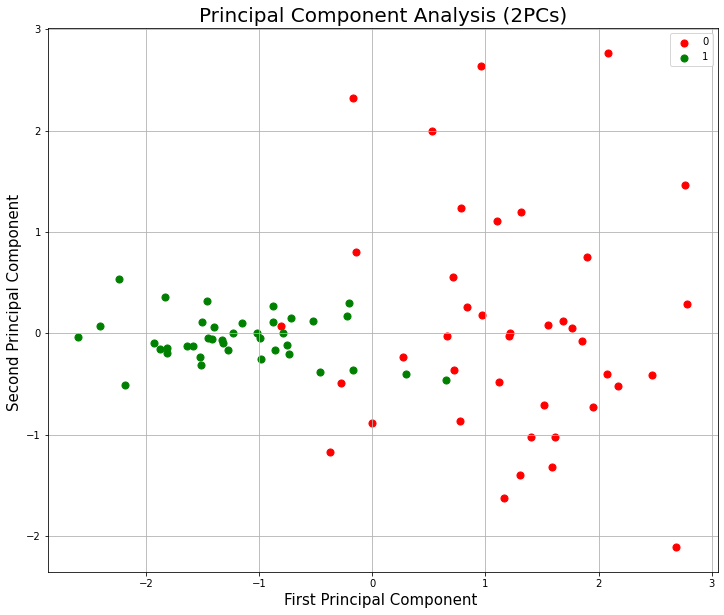

In [77]:
# Visualize Principal Components with a scatter plot
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs)', fontsize = 20)

targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = result_df.loc[result_df['y'] == target]
    #print(result_df.loc[indicesToKeep, 'PC1'])
    ax.scatter(indicesToKeep['PC1'], 
               indicesToKeep['PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()


In [7]:
indicesToKeep = result_df.loc[result_df['y'] == target]
print(indicesToKeep['PC1'])

40    1.295287
41    1.087126
42    1.378309
43    2.428913
44    1.225919
45    1.737452
46    0.916222
47   -0.129243
48    1.551279
49    0.904305
50    0.276660
51    0.748972
52    0.579176
53    1.954245
54    1.590907
55    0.814981
56    1.805107
57    1.166948
58    2.305283
59    0.769549
60    1.773738
61    0.042333
62   -0.199786
63    1.385008
64    0.970342
65    1.117459
66    1.207385
67    2.184884
68    2.337098
69    1.005942
70    1.947566
71    1.436911
72    0.344280
73    0.787734
74    1.729186
75   -0.213069
76   -0.809400
77    0.779796
78    2.083317
79    1.091531
Name: PC1, dtype: float64


In [67]:


class1_layer = []
class2_layer = []

for i in X[:40]:    
    point = {
        'x': i[0],
        'y': i[1],
        'pred': 0,
        'actual': 0,
        'guid': str(uuid.uuid4())
    }
    class1_layer.append(point)


for i in X[40:]:
    point = {
        'x': i[0],
        'y': i[1],
        'pred': 1,
        'actual': 1,
        'guid': str(uuid.uuid4())
    }
    class2_layer.append(point)


In [50]:
classes

[{'meta': {},
  'layers': [[{'x': -0.37964077849966826,
     'y': 1.2477699257014219,
     'pred': 0,
     'actual': 0,
     'guid': '118ad5e6-157c-44f0-8f38-5abccd9401cc'},
    {'x': -1.8655209433466866,
     'y': -1.495480656742373,
     'pred': 0,
     'actual': 0,
     'guid': 'cee6871c-92e9-49cd-b6fd-d7d26cebd31c'},
    {'x': -1.1957604141133789,
     'y': 0.11641658297339211,
     'pred': 0,
     'actual': 0,
     'guid': '099aad3e-72c6-4ea6-8db7-7ab247086231'},
    {'x': 0.11921879431493795,
     'y': 1.6984430857384518,
     'pred': 0,
     'actual': 0,
     'guid': '24032ebf-688a-469c-bf13-ee257ecb7194'},
    {'x': -0.883461742094385,
     'y': 1.343010158012495,
     'pred': 0,
     'actual': 0,
     'guid': 'e55d80ff-4005-49d4-b994-1509b4ba33ed'},
    {'x': -0.8973586497108506,
     'y': 1.3855917551723824,
     'pred': 0,
     'actual': 0,
     'guid': '5ba89c70-e9e1-4a38-84fb-afa8656b3b61'},
    {'x': 0.2808310054806151,
     'y': 0.3100812350020695,
     'pred': 0,
     '

In [83]:
import json 

result = {}
result["n_layers"] = str(3)
result["classes"] = classes

with open('synth_json1.json', 'w') as outfile:
    json.dump(result, outfile)

In [82]:

print(arr_guid)

['516dc476-0148-40fd-8da3-8cfe63b5f1ae', '6a59318d-751d-4346-b720-d0fb0685571e', '4362a7a5-95c3-42db-a7c8-f367d4020998', '33da1322-997c-4a9d-a616-bf7073348256', 'f05e35b4-596f-4a1a-843e-d0affbd3337f', '151fa5d3-c9fd-4d38-86f2-8b3617df55c4', 'e9aa1d07-7cf1-4697-a31e-22fe664b8b53', '48ef1537-8cb9-4289-ad54-6b8f2eff4346', 'e3422975-acdd-40b0-bbdb-fcf8277af302', '023d2024-7f67-4b74-a372-bb9baeb8c8a2', '7fc80a63-0914-4dcd-97b3-c6fc18ee75dd', 'ff2b3365-39b8-43f4-ba73-6b28b3c0b58d', '29ad33fe-300e-487f-ab77-b04cddd8f939', '31747951-5d2e-454d-b9f1-6553e3e3ea07', 'ce7210b9-93be-4d5d-b04a-437136c08781', '2d667617-e7bf-4574-8cb8-3b8da6e50d72', '3d9f5d74-7e37-4e79-951e-1a26ec43fe0d', '3f87a670-95e9-4e1d-a298-e69ef40faa05', '53509637-71b0-40a3-9d5d-8f132c1bff9a', '07003af7-86b0-4619-8d7c-ba79d179abc1', 'e6c5ad9f-e0ef-445b-9157-88b375b86d4b', '968fac17-a461-47fd-ab43-f934786b029b', 'd816c0ba-7c80-4ef8-82f4-dda3bf5a0b20', 'b4c3e24f-7b8c-44c2-8176-2a859138bbcf', '8f2f5c93-990a-4770-b8f1-9bcff0b841fb',